# **L'analyse économétrique des réseaux bipartis**

### **Sommaire:**

**I - Introduction**

**II - Création du graphe**

&nbsp;&nbsp;&nbsp;&nbsp;*A) Les réseaux Bipartis*

&nbsp;&nbsp;&nbsp;&nbsp;*B) Application aux interactions entre les médecins et les patients*

**III - Modèle AKM**

&nbsp;&nbsp;&nbsp;&nbsp;A - Estimation

&nbsp;&nbsp;&nbsp;&nbsp;B - Performance

&nbsp;&nbsp;&nbsp;&nbsp;*C) Effet de la sparcité sur la qualité de l'estimation*

**IV - Co-clustering**

&nbsp;&nbsp;&nbsp;&nbsp;*A) Méthode d'estimation*

&nbsp;&nbsp;&nbsp;&nbsp;*B) Application et Résultats*

&nbsp;&nbsp;&nbsp;&nbsp;*C) Groupes et effets propres*

**V - Conclusion**

### **I - Introduction**

Dans les réseaux bipartis, on considère deux types d'agents. Chaque agent peut interagit avec un ou plusieurs agents de l'autre type, mais jamais du sien. Ces structures bipartites sont présentes dans de nombreux domaines de l'économie, comme dans la relation travailleur - entreprise ou encore patient - médecin. Dans les réseaux bipartis, les deux types d'agents peuvent avoir des effets propres inobservés, le talent du travailleur et l'image de l'entreprise par exemple, on parle alors d'hétérogénéité inobservé bilatérale. 

Un grand enjeu des réseaux bipartis est alors de parvenir à identifier et à estimer ces effets propres.
Dans le cadre du séminaire de modélisation statistique et de la conférence de Mr. Lecué, nous nous intéresserons en particulier à la relation entre médecins et patients. 

Afin de modéliser ces réseaux et de parvenir à identifier ces hétérogénéités bilatérales, nous nous appuyons sur l'article "Econometric Analysis of Bipartite Networks" de Stéphane Bonhomme. 
Dans cet article Bonhomme mène une revue des différentes technique et méthodes économétriques utilisées pour analyser les graphes bipartis. Nous nous intéressons en particulier à deux de ces méthodes: 

- 1\) L'estimateur AKM (pages 7 à 10) et 
    
- 2\) L'identification en deux étapes grâce au co-clustering (pages 30 à 33).


### **II - Création du Graphe**

#### *A) Les réseaux Bipartis*

Un graphe biparti est un un graphe où l'ensemble des sommets V est séparé en deux sous-ensembles V1 et V2 tel que toutes les arrêtes de l'ensemble des arrêtes E relient un point de V1 à un point de V2. Il ne peut donc pas avoir d'arrête entre deux points de V1 ou deux points de V2. 

Un réseau biparti est un graphe biparti (V1,V2,E) où les sommets et les arrêtes du graphe sont associés à des variables aléatoires. Soit i in élément de V1 et j un élément de V2, on introduit des variables aléatoires $D_{ijt}$ qui valent 1 si i et j sont reliés au moins t fois et 0 sinon. Le "t" est introduit pour prendre en compte plusieurs liens entre i et j, en fonction du problème étudié si un seul lien peut exister entre un point de V1 et un point de V2 il peut être omis. On introduit ensuite des variables $Y_{ijt}$ qui correspondent à un résultat d'un appariement entre i et j pour le lien t. $Y_{ijt}$ n'est observé que si $D_{ijt}$ = 1.
Pour prendre un exemple concret, V1 peut correspondre aux travailleurs, et V2 aux entreprises, si un travailleur i de V1 travaille dans une entreprise j de V2 alors $D_{ij}$ = 1. On peut alors prendre $Y_{ij}$ le salaire de i lorsqu'il travaille dans l'entreprise j. Ce salaire n'est observé que si i travaille réellement chez j et donc si $D_{ij}$ = 1.

De plus, $Y_{ijt}$ dépend d'une variable $X_{ijt}$ qui correspond à des caractéristiques observées de la relation t entre i,j, de deux variables inobservées $\alpha_{i}$ et $\psi_{j}$ qui correspondent à des caractéristiques propres à i et à j ainsi que de $\epsilon_{ijt}$ correspondant aux caractéristiques inobservées de la relation t entre i,j.
La présence de $\alpha_{i}$ et $\psi_{j}$ correspond à ce que nous appelions dans l'introduction l'hétérogénéité inobservé bilatérale.

Nous ferons par la suite, et donc pour les deux modèles présentés, l'hypothèse que le réseau est exogène c'est à dire :
 $ \forall i \in V_1, \forall j \in V_2  $  $D_{ijt} \perp \epsilon_{ijt} \mid (X_{ijt}, \alpha_{i}, \epsilon_{j})$.
On fera aussi l'hypothèse suivante :
 $Y_{ijt} \perp Y_{i'j't} \mid X, \alpha, \psi, D \quad \text{pour tout } (i, j) \ne (i', j')$ 

 Pour un modèle linéaire, le modèle sera donc le suivant :
 $ \forall i \in V_1, \forall j \in V_2  $  
 $Y^*_{ijt} = X'_{ijt} \beta + \alpha_i + \psi_j + \epsilon_{ijt}$ 
 
 $Y_{ijt} = D_{ijt} \cdot Y^*_{ijt}$

 Avec l'hypothèse que : $\mathbb{E}[\epsilon_{ijt} \mid D, X, \alpha, \psi] = 0$


#### *B) Application aux interactions entre les médecins et les patients*

Nous allons maintenant appliquer cette théorie des réseaux bipartis à notre problème d'interaction entre les médecins et les patients.

On commence par créer une instance de notre graphe bipartite. 

On se place dans un contexte médicale avec un certains nombres de patients i et de docteurs j. Dans notre problème, nous prenons $X_{ij}$ comme étant la distance entre le patient i et le medecin j. 

Leurs positions respectives sont générées aléatoirement sur [0;1]x[0;1] et on calcule les distance $X_{ij}$ = $distance_{ij}$.

In [1]:
import numpy as np
import fonctionsAKM

On fixe le nombre de patients et le nombre de docteurs.

In [2]:
nombre_patient=100
nombre_docteur=30

On crée le graphe.

In [3]:
akm = fonctionsAKM.graph_AKM(nombre_patient, nombre_docteur)

On génère ensuite des effets fixes pour les médecins et les docteurs.
L'effet fixe du patient peut correspondre à son état de santé global et celui du docteur, sa renomée

In [4]:
alpha = -np.random.randint(0,3,size=akm.nombre_patient)/10
psi = np.random.randint(0,3,size=akm.nombre_docteur)/10
beta_lien = -2

On génère ensuite la matrice des liens (qui correspond à la matrice $D_{ij}$ présenté dans le modèle théorique) selon le modèle suivant:

$Lien_{ij}$ suit un loi de Bernouilli de paramètre $\frac{e^{\lambda_{ij}}}{1+e^{\lambda_{ij}}}$ où:

 $\lambda_{ij}=  \beta_{lien} * distance_{ij} + \alpha_{i} + \psi_{j} $

In [5]:
akm.create_link(alpha, psi, beta_lien, show=False)

In [6]:
print("sparcity = ", int(akm.lien.sum())/(akm.nombre_docteur*akm.nombre_patient))

sparcity =  0.24766666666666667


On a ici une sparcité de 0.248.

###  **III - Modèle AKM**

#### *A) Principe de l'estimation*

Ensuite, on génère un prix de consultation potentiel $Y^*$ selon le modèle suivant:

Pour des effets fixes:

$\alpha_i$ du docteur $i$ et $\psi_j$ du patient $j$. (par exemple la gravité de la maladie et si le docteur est bon ou non)

$Y^*_{ij} = constente + \alpha_i + \psi_j + \beta*distance_{ij} + \epsilon_{ij} \quad$  où $\epsilon_{ij} \sim_{iid} \mathcal{N}(0,v)$

On considère ensuite $Y=Lien \times Y^*$, le prix observé, et on résout avec AKM.

In [7]:
alpha_sante = -np.random.randint(0,3,size=akm.nombre_patient)/1
psi_sante = np.random.randint(0,3,size=akm.nombre_docteur)/1
psi_sante[len(psi_sante)-1]=0 #identification

print("effet fixe patient:", alpha_sante)
print("")
print("effet fixe docteur:", psi_sante)

effet fixe patient: [ 0. -1. -2. -1. -2. -2. -2. -1. -2.  0.  0. -1.  0. -1.  0. -1. -2. -1.
 -2. -1.  0.  0. -2. -2. -2. -2. -2. -2. -1. -2. -1. -1.  0. -2. -1. -2.
  0. -2. -1. -2. -1. -2. -2. -2.  0. -1. -2. -2.  0.  0. -1.  0. -1.  0.
 -1. -1. -2. -2. -2. -1. -1. -1. -2. -1.  0. -1.  0.  0. -2.  0. -2.  0.
 -1. -2. -2. -1. -1. -1.  0.  0. -2. -2. -1. -2.  0. -1.  0. -2. -2. -1.
 -1.  0.  0. -2. -1.  0. -2. -2. -1. -2.]

effet fixe docteur: [2. 0. 0. 2. 2. 0. 2. 1. 2. 0. 0. 0. 2. 2. 0. 2. 0. 0. 1. 1. 0. 2. 0. 1.
 1. 2. 2. 0. 0. 0.]


In [ ]:
estimation = akm.solve_model(alpha_sante, psi_sante, constente=0, beta=1)

print(f"""
la constante estimée est: {estimation[0][0]}, au lieu de: {akm.constente}
le beta estimée est: {estimation[0][1]}, au lieu de: {akm.beta}
les α estimés sont: {estimation[1][:3]}..., au lieu de: {akm.alpha[:3]}...
les ψ estimés sont: {estimation[2][:3]}..., au lieu de: {akm.psi[:3]}...
""")

akm.model_recap()


On peut ensuite mesurer la performance du modèle et en particulier les MSE:

In [ ]:
a = akm.show_perf() 

#### *C) Effet de la sparcité sur la qualité de l'estimation*

On veut voir comment évolue la qualité de l'estimation des effets fixes avec la densité du graph. 

Pour cela on fixe un modèle pour les prix mais on change les paramètres du modèle de création des liens.

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:19<00:00,  1.97s/it]


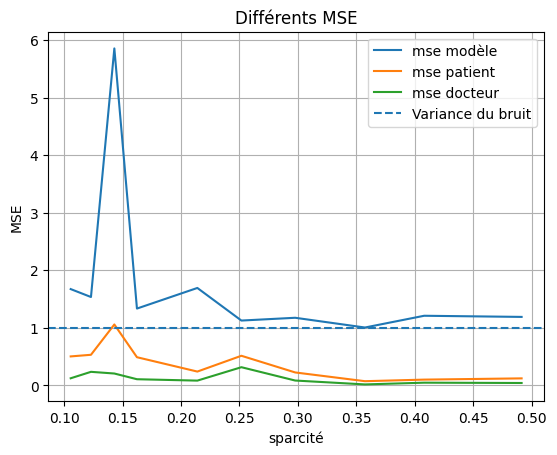

In [ ]:
if True:
    akm.sparcity(-5,0,10)

### **IV - Co-clustering**

#### *A) Principe de l'estimation*

On reprend les mêmes notations et le même modèle que précédemment.

L'objectif principal de cette méthode est d'identifier $\beta_{lien}$ et $\beta$ en deux étapes:
- La première étape identifie grâce au clustering différents groupes de patients et de docteurs en fonction de leur nombre de liens. 
- La deuxième étape effectue des régressions de nos variables d'intérêts sur no co-variables et sur les différents clusters de patients et de docteurs.

**Étape 1:**

Pour chaque patient $i$, on calcule ses moments pondérés $M_{1,i}$ et $M_{2,i}$ où:

$M_{1,i} = \sum_{j=1} ^J D_{ij}$

$M_{2,i} = \sum_{j=1} ^J D_{ij}Y_{ij}$

On clusterise ensuite avec k-means nos patients selon la statistique: $ M_{1,i}*\sigma_{1,i} + M_{2,i}*\sigma_{2,i}$

où $\sigma_{1,i}$ est l'écrat-type de $D_i$ et $\sigma_{2,i}$ est l'ecart-type de $(D*Y)_i$

On obtient alors un ensemble de clusters de patients $(CP_k)_{1<k<K}$

On reprend exactement les mêmes étapes pour les docteurs $j$, pour obtenir les clusters $(CD_l)_{1<l<L}$

**Étape 2:**

On effectue deux régressions pour obtenir les coefficients $\beta_{lien}$ et $\beta$ de $X$

- Une régression probit ou logit de $D \sim (1, X, (1_{CP_k})_{1<k<K-1}, (1_{CD_l})_{1<l<L-1})$  qui permet d'obtenir $\beta_{lien}$
- Une régression MCO de $Y \sim (1, X, (1_{CP_k})_{1<k<K-1}, (1_{CD_l})_{1<l<L-1})$ qui permet d'obtenir $\beta$

La deuxième régression se faisant bien entendu sur les observations uniquement.

#### *B) Application et Résultats*

L'article de Bonhomme utilise comme exemple un modèle où:

- $D$ suit un modèle probit 
- $I=J$
- $\alpha_i = \gamma effetpatient_i$ et  $\psi_i = \gamma effetdocteur_i$

Autrement dit, les effets propres des docteurs et des patients sont proportionnels dans les deux modèles.

Dans notre cas, $D$ suit un logit. Nous créons un modèle avec les deux dernières conditions.

In [41]:
import numpy as np
import fonctionsAKM

In [42]:
nombre_docteur_cc=100
nombre_patient_cc=100

akm_cc=fonctionsAKM.graph_AKM(nombre_patient_cc,nombre_docteur_cc)

#création lien
akm_cc.effet_pat = -np.random.randint(0,30,size=nombre_patient_cc)/10
akm_cc.effet_doc = np.random.randint(0,30,size=nombre_docteur_cc)/10
akm_cc.beta_lien = -2

#création prix
akm_cc.alpha = akm_cc.effet_pat/10
akm_cc.psi = akm_cc.effet_doc/10
akm_cc.constente = 1
akm_cc.beta = 3
akm_cc.std_bruit = 1

akm_cc.model_recap()

 Les liens sont créés selon le modèle: Dij ~ B (1-1/(1+exp(λij))) 
                où λ_ij = -2*Xij + effet_pati + effet_docj
                avec effet_pat dans [-2.9;0.0]
                avec effet_doc dans [0.0;2.9]
                
 Les prix sont créés selon le modèle: Yij = 1 + 3*Xij + αi + ψj + εij
                où εij ~ N(0,1)
                avec α dans [-0.29;0.0]
                avec ψ dans [0.0;0.29]
                


On crée notre graph

In [43]:
akm_cc.create_link(show=False )
print("sparcité = ", int(akm_cc.lien.sum())/(akm_cc.nombre_docteur*akm_cc.nombre_patient))

sparcité =  0.3459


On définit notre nombre de clusters

In [44]:
nombre_cluster_cc = 10

On fait la régression.

In [45]:
modèle_cc=akm_cc.coclustering(nombre_cluster=nombre_cluster_cc, print_reg=False ,print_corr=False)

la valeur de beta lien estimée est :-2.1881263121145094, elle est en réalité de -2
la valeur de beta estimée est :3.015244634560932, elle est en réalité de 3


Plus précisément la régression logit $D \sim (1, X, (1_{CP_k})_{1<k<K-1}, (1_{CD_l})_{1<l<L-1})$ donne:

In [46]:
print(modèle_cc[0].summary())

                           Logit Regression Results                           
Dep. Variable:                   link   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Thu, 08 May 2025   Pseudo R-squ.:                  0.2112
Time:                        16:47:18   Log-Likelihood:                -5086.8
converged:                       True   LL-Null:                       -6448.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8670      0.121     -7.146      0.000      -1.105      -0.629
distance              -2.1881      0.110    -19.950      0.000      -2.403      -1.973
cluster_patients_0  

Et la régresion MCO de $Y \sim (1, X, (1_{CP_k})_{1<k<K-1}, (1_{CD_l})_{1<l<L-1})$ donne:

In [47]:
print(modèle_cc[1].summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     103.1
Date:                Thu, 08 May 2025   Prob (F-statistic):          1.06e-318
Time:                        16:47:18   Log-Likelihood:                -4820.1
No. Observations:                3459   AIC:                             9680.
Df Residuals:                    3439   BIC:                             9803.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2188      0

#### *C) Groupes et effets propres*

On voit qu'à priori, les coefficients des clusters de nos régressions ne correspondent pas tout à fait avec les vrais effets fixes. 

Cependant, nous pouvons essayer de voir si les clusters sont cohérents.

Pour cela nous étudions deux corrélations. 

- Celle entre les effets fixes, $\alpha_i$ et le coefficient estimé du cluster dans lequel se trouve $i$, $\hat{\alpha}_{CP(i)}$, resp pour les docteurs j

- Celle entre les effets fixes, $\alpha_i$ et la moyenne des effets fixes du cluster contenant $i$, $\bar{\alpha}(CP(i))$, resp pour les docteurs j


la valeur de beta lien estimée est :-2.1881263121145094, elle est en réalité de -2
la valeur de beta estimée est :3.015244634560932, elle est en réalité de 3
Corélation des effets fixes des docteurs avec ceux estimés par la régression sur les clusters 0.8936465506332206
Corélation des effets fixes des patients avec ceux estimés par la régression sur les clusters 0.8105413452490245
Corrélation des effets fixes des docteurs avec la moyenne du groupe estimé 0.9467047259557606
Corrélation des effets fixes des patients avec la moyenne du groupe estimé 0.955641239361694


/home/onyxia/Embedding/fonctionsAKM.py:408: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


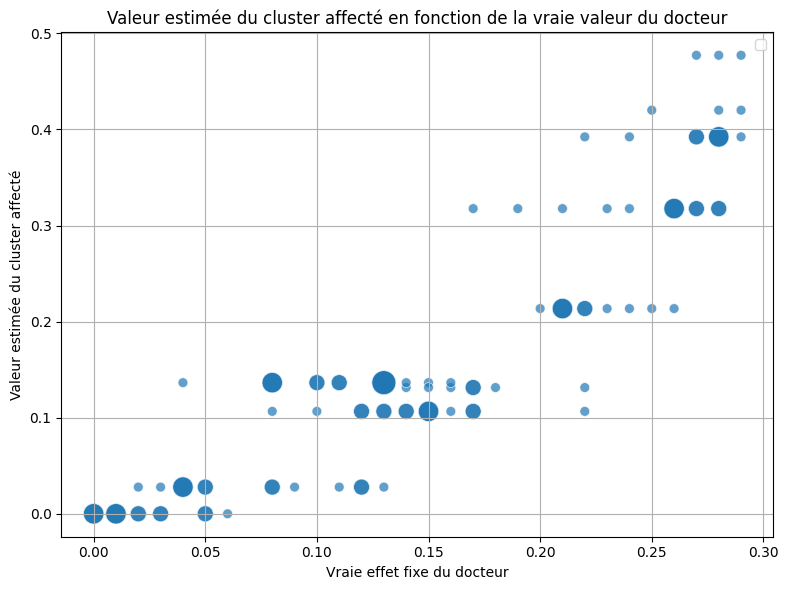

/home/onyxia/Embedding/fonctionsAKM.py:432: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


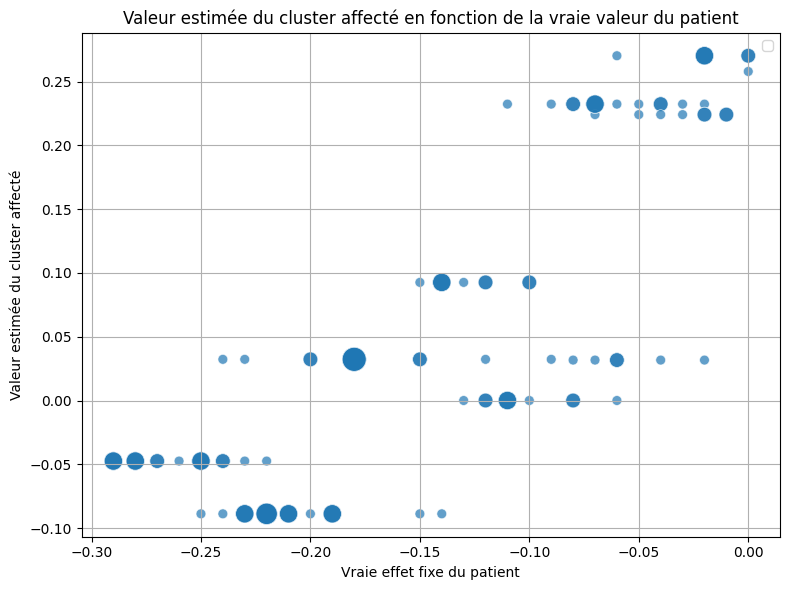

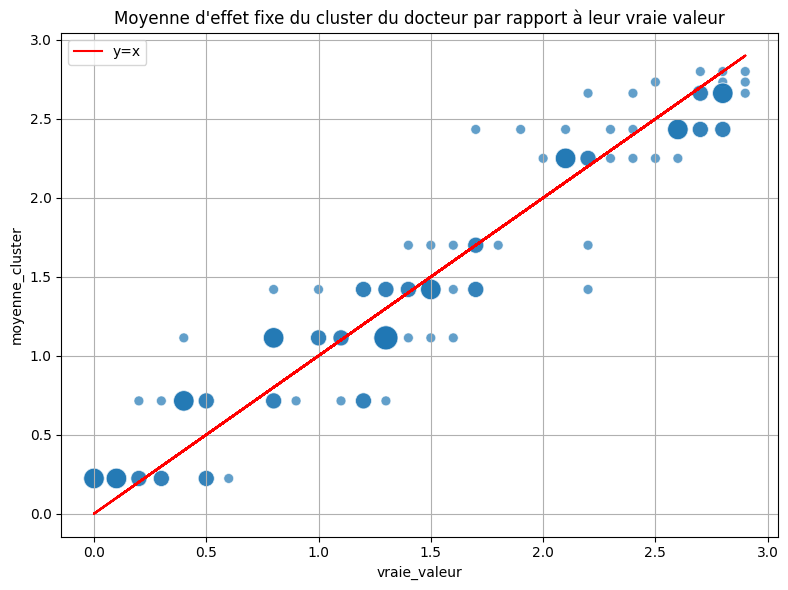

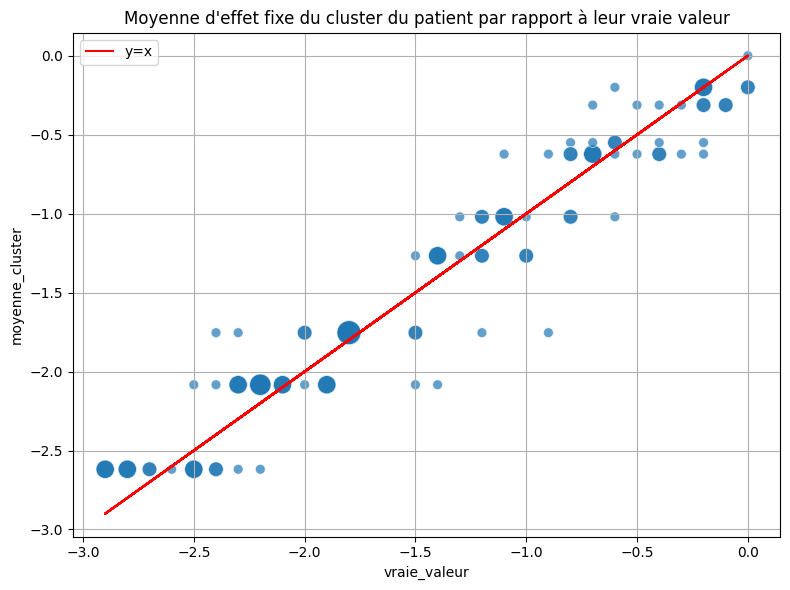

In [48]:
_=akm_cc.coclustering(nombre_cluster=nombre_cluster_cc, print_reg=False ,print_corr=True)

Relancer le modèle plusieurs fois permet de voir que l'on a des corrélations qui peuvent être assez variables

Mais on constate globalement que nos clusters sont bien voire très bien corrélés à nos vrais effets fixes